# <center>  DOMAĆI ZADATAK 3 </center>

## Zadatak

Datoteka svmData_ls.txt sadrzi odbirke dve linearno separabilne klase. U prve dve kolone su prediktori a u
poslednjoj odziv. Datoteka svmData_nls.txt ima istu strukturu, osim sto su u pitanju odbirci klasa koje nisu
linearno separabilne.

1. Napisite kod za ucenje parametara α SVM-a sa linearnim kernelom bez regularizacije. Mozete da koristite
gotovu f-ju za numeriˇcku optimizaciju (kvadratno programiranje, SMO itd). Primenite ovaj klasifikator na
linearno separabilni skup. Prikazite na istoj slici primere iz obucavajuceg skupa i separacionu pravu. Naznacite
pripadnost klasi (npr. razlicitim bojama). Vidno oznacite nosece vektore. <br/><br/>

* Dopunite kod tako sto cete uvesti gubitak tipa "sarke" (formulacija sa regularizacijom). Ponovo prikazite istu
sliku kao u prethodnoj tacki. Komentarisite prednosti i nedostatke regularizacije. Kako ste izabrali konstantu
C? <br/><br/>

* Napisite program za ucenje parametara α SVM-a sa regularizacijom i kernelom po sopstvenom izboru. Primenite
ovaj program na skup iz datoteke svmData_nls.txt. Prikazite isti grafik kao ranije. Komentarisite kako ste
izabrali parametre kernela i konstantu regularizacije C.

## Rezultati

U zadatku postoje dva skupa podataka, gde je jedan linearno separabilan, a drugi nije. Na slikama ispod je su prikazana ova dva skupa. Primeri imaju dva samo prediktora, te je vizuelizacija u 2D ravni moguca.

In [1]:
import numpy as np
from cvxopt import matrix, solvers
from matplotlib import pyplot as plt

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

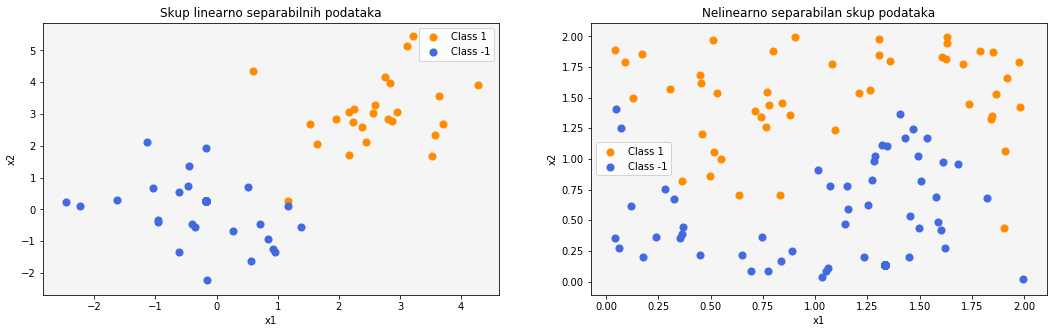

In [2]:
# Ucitavanje linearno separabilnog skupa podataka
data = np.loadtxt('svmData_ls.txt')
X = data[:,0:-1]
y = data[:,-1].reshape(-1,1)

# Ucitavanje skupa podataka koji nije linearno separabilan
data_nl = np.loadtxt('svmData_nls.txt')
X_nl = data_nl[:,0:-1]
y_nl = data_nl[:,-1].reshape(-1,1)

ind_1 = np.where(y==1)
ind_neg_1 = np.where(y==-1)
ind_1_nl = np.where(y_nl==1)
ind_neg_1_nl = np.where(y_nl==-1)

# Plotovanje ova dva skupa podataka
fig, ax = plt.subplots(1, 2, figsize = (18, 5))
ax[0].set_facecolor('whitesmoke')
ax[0].scatter(X[ind_1, 0], X[ind_1, 1], c='darkorange', label='Class 1', s = 50)
ax[0].scatter(X[ind_neg_1, 0], X[ind_neg_1, 1], c='royalblue', label='Class -1', s = 50)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Skup linearno separabilnih podataka')  
ax[0].legend()    

ax[1].set_facecolor('whitesmoke')
ax[1].scatter(X_nl[ind_1_nl, 0], X_nl[ind_1_nl, 1], c='darkorange', label='Class 1', s=50)
ax[1].scatter(X_nl[ind_neg_1_nl, 0], X_nl[ind_neg_1_nl, 1], c='royalblue', label='Class -1', s=50)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('Nelinearno separabilan skup podataka')  
ax[1].legend() 

plt.show()        

Učenje parametara $\alpha$ se radi pomocu kvadratnog programiranja. U prvom slucaju se koristi linearni kernel i ne postoji regularizacija, pa Lagranzijan za dualni problem i uslovi dobijeni iz Karush–Kuhn–Tucker-ove teoreme izgledaju kao u izrazima ispod. Kernel je oznacen kao K i u ovom domacem zadatku su korisceni linearni, polinomialni i Gausovski kernel. <br/><br/>

<center>  $L_{D}$ = $\sum_{i = 1}^{m} \alpha_{i} - \sum_{i = 1}^{m} \sum_{j = 1}^{m} \alpha_{i} \alpha_{j} y^{(i)} 
y^{(j)} K(x^{(i)}, x^{(j)}) $  </center> <br/>
<center> $\sum_{i = 1}^{m} \alpha_{i}y^{(i)} = 0$   </center> <br/>
<center> $\alpha \geq$ 0   </center> 


Optimizacija je uradjena koriscenjem funkcije iz biblioteke CVXOPT koja prima nekoliko parametara koji se odredjuju uporedjivanjem kvadratnog problema za izrazima iznad. Standardna forma je sastavljena iz minimizacije kvadratne funkcije i dva uslova gde je dan nejednakost, a drugi jednakost. <br/><br/>

<center> $f(x) = \frac{1}{2}x^{T}Px + q^{T}x$   </center> <br/>
<center> $Gx \geq h$   </center> <br/>
<center> $Ax = b$   </center> <br/>

Odavde se moze uociti da je $\alpha \equiv x$, da je $P$ matrica nastala od clana sume $y^{(i)} 
y^{(j)} K(x^{(i)}, x^{(j)})$ dimenzija $m$, $q$ je vektor sa negativnim jedinicama, $G$ je dijagonalna matrica sa negativnim jedinicama, $h$ je vektor nula, $b$ je nula i $A \equiv y$. 

In [3]:
from domaci3 import SVM, linear_K, polynomial_K, Gaussian_K
from sklearn.model_selection import train_test_split

# Podela skupa na trenirajuci i testirajuci
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, shuffle = True)

# Pravi se objekat klase SVM
svm = SVM(kernel = 'linear')

# Pronalaze se optimalni multiplikatori alpha*, noseci vektori, optimalne tezine w* i optimalno b*
svm.fit(X_train, y_train)

Vektor $\alpha$ se sastoji iz $m$ komponenti i nakon njihovog izracunacanja, tako da Lagranzijan $L_{D}$ bude minimalan i dva pomenuta uslova ispunjena, se mogu najpre odrediti noseci vektori. Noseci vektori su oni vektori tj. primeri koji odgovaraju pozitivnim Lagranzevim multiplikatorima tj. alfama. Potom se racunaju tezine $\omega$ i parametar $b$.  <br/><br/>

<center> $\omega^{*} = \sum_{i = 1}^{m} \alpha_{i}^{*} y^{(i)} x^{(i)}$   </center> <br/>
<center> $b^{*} = \frac{1}{y^{nv}} - \sum_{i = 1}^{N} \alpha_{nv}^{*} y^{nv} K(x^{(i)},x^{nv})$   </center> <br/>

Tezine su korisne samo u slucaju formiranja separabilne prave, dok je kod kontura ili kriva (nelinearnih kernela) moguce odrediti separacionu krivu i bez prethodnig racunanja tezina. Oznaka $nv$ predstavlja nosece vektore, a $N$ broj primera koji ispunjavaju uslov zapisan kao nejednakost iznad. Kada ima regularizacije ovaj uslov se menja, pa broj nosecih vektora nije jednak broju $N$.

In [4]:
def plot_class_region(fig, ax, svm, X, y, plot_nv = False):

    # Formiranje mreze vrednosti iz opsega vrednosti prediktora x1 i x2
    t1 = np.linspace(min(X[:,0])-1, max(X[:,0]+1), 50)
    t2 = np.linspace(min(X[:,1])-1, max(X[:,1]+1), 50)
    x1x1, x2x2 = np.meshgrid(t1, t2)
    X_grid = np.c_[np.ravel(x1x1), np.ravel(x2x2)]

    # Racunanje f(x) za sve vrednosti X_grid-a
    Z = svm.compute_f(X_grid).reshape(x1x1.shape)
    
    # Indeksi primera gde je izlazna promenljiva 1 ili -1
    ind_1 = np.where(y==1)
    ind_neg_1 = np.where(y==-1)

    
    # Separaciona prava je za f(x)=0, tj. na preseku boja regiona
    ax.contourf(x1x1, x2x2, Z, levels = 0, cmap=plt.cm.coolwarm, alpha = 0.6, filled = True)
    ax.scatter(X[ind_1, 0], X[ind_1, 1], c='r', label='Class 1', s=50)
    ax.scatter(X[ind_neg_1, 0], X[ind_neg_1, 1], c='b', label='Class -1', s=50)
    if plot_nv == True:
        ax.scatter(svm.support_vectors[0][:,0], svm.support_vectors[0][:,1], c = 'w', linewidths = 0.1, s=20)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')    
    ax.legend()
    
    return ax

Text(0.5, 1.0, 'Klasifikacija trening skupa')

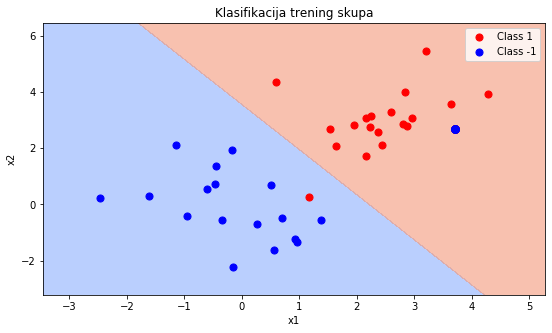

In [5]:
# Pravi se figura za plotovanje
fig, ax = plt.subplots(figsize = (9, 5))
ax = plot_class_region(fig, ax, svm, X_train, y_train)
ax.set_title('Klasifikacija trening skupa')  

Malim belim kruzicima su prikazani noseci vektori i ovo je rezultat koji se dobija bez regularizacije i sa linearnim kernelom. Na narednim slikama bice uporedjenje slike sa razlicitim vrednostima parametra $C$ tj. regularizacijom. Kod regularizacije sa linearnim kernelom nema vecih razlika u krajnjem rezultatu predikce. Sto je parametar $C$ veci to se teze dozvoljava losa klasifikacija parametara i povecava sansa da dodje do preobucavanja iz tog razloga. Ukoliko je $C$ manje, to se vise dozvoljava losa klasifikacija i povecava sansa da dodje do podobucavanja.

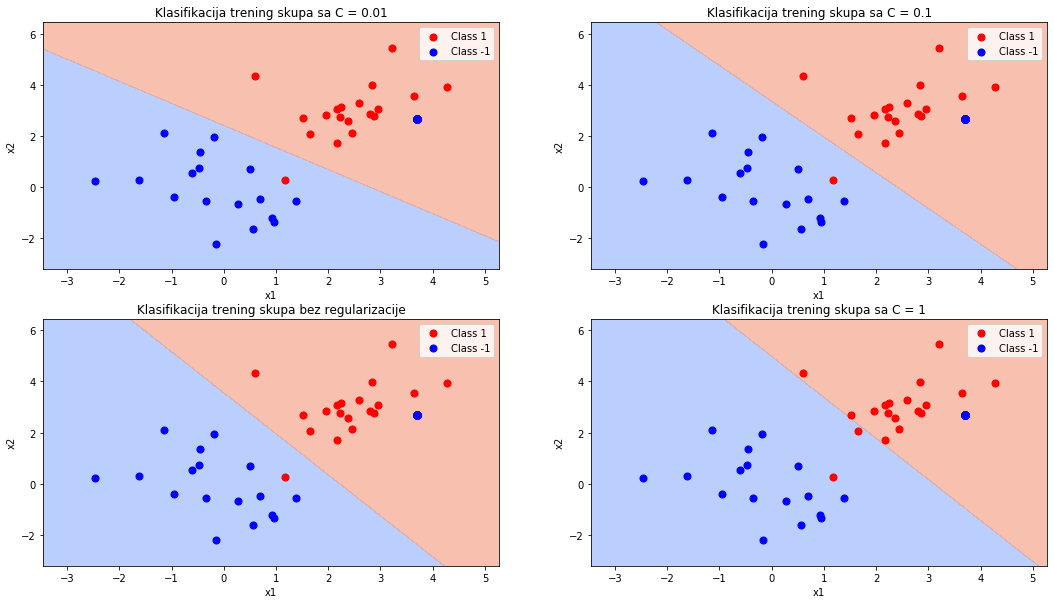

In [6]:
# Vektor vrednosti C
C = [0.01, 0.1, None, 1]
fig, axes = plt.subplots(2,2,figsize = (18, 10))

i = 0
for ax in axes.flat:
    if C[i]==None:
        svm = SVM(kernel = 'linear')
    else:
        svm = SVM(kernel = 'linear', C = C[i])
    svm.fit(X_train, y_train)
    ax = plot_class_region(fig, ax, svm, X_train, y_train) 
    if C[i]==None:
        ax.set_title('Klasifikacija trening skupa bez regularizacije')
    else:
        ax.set_title('Klasifikacija trening skupa sa C = ' + str(C[i]))  
    i +=1        

Ukoliko se uce Lagranzevi multiplikatori sa kernelom koji nije linearan dolazi do sitnih promena u definisanju ulaznih parametara funkcije za optimizaciju. Takodje, ovde ce se bolje videti uticaj parametra $C$, jer ce separaciona kriva uspevati da cak i idealno razdvoji klase kada je $C$ veliko. To podrazumeva vise krivina, dok je za manje $C$ kriva uglacanija i ne odvaja toliko dobro klase. <br/>
U ovom delu zadatke se radi sa nelinearno razdvojivim podacima, najpre sa polinomialnim kernelom, pa zatim sa Gauss-ovskim. Parametar $d$ predstavlja stepen,a $\sigma$ odredjuje slicnost okruzenja. <br/><br/>
<center> $K_{polynomial}(x, y) = (x^{T}y + C)^{d}$ </center> <br/>
<center> $K_{gaussian}(x, y) = e^{-\frac{\lVert x - y \rVert^{2}}{2\sigma^{2}}}$ </center> <br/>


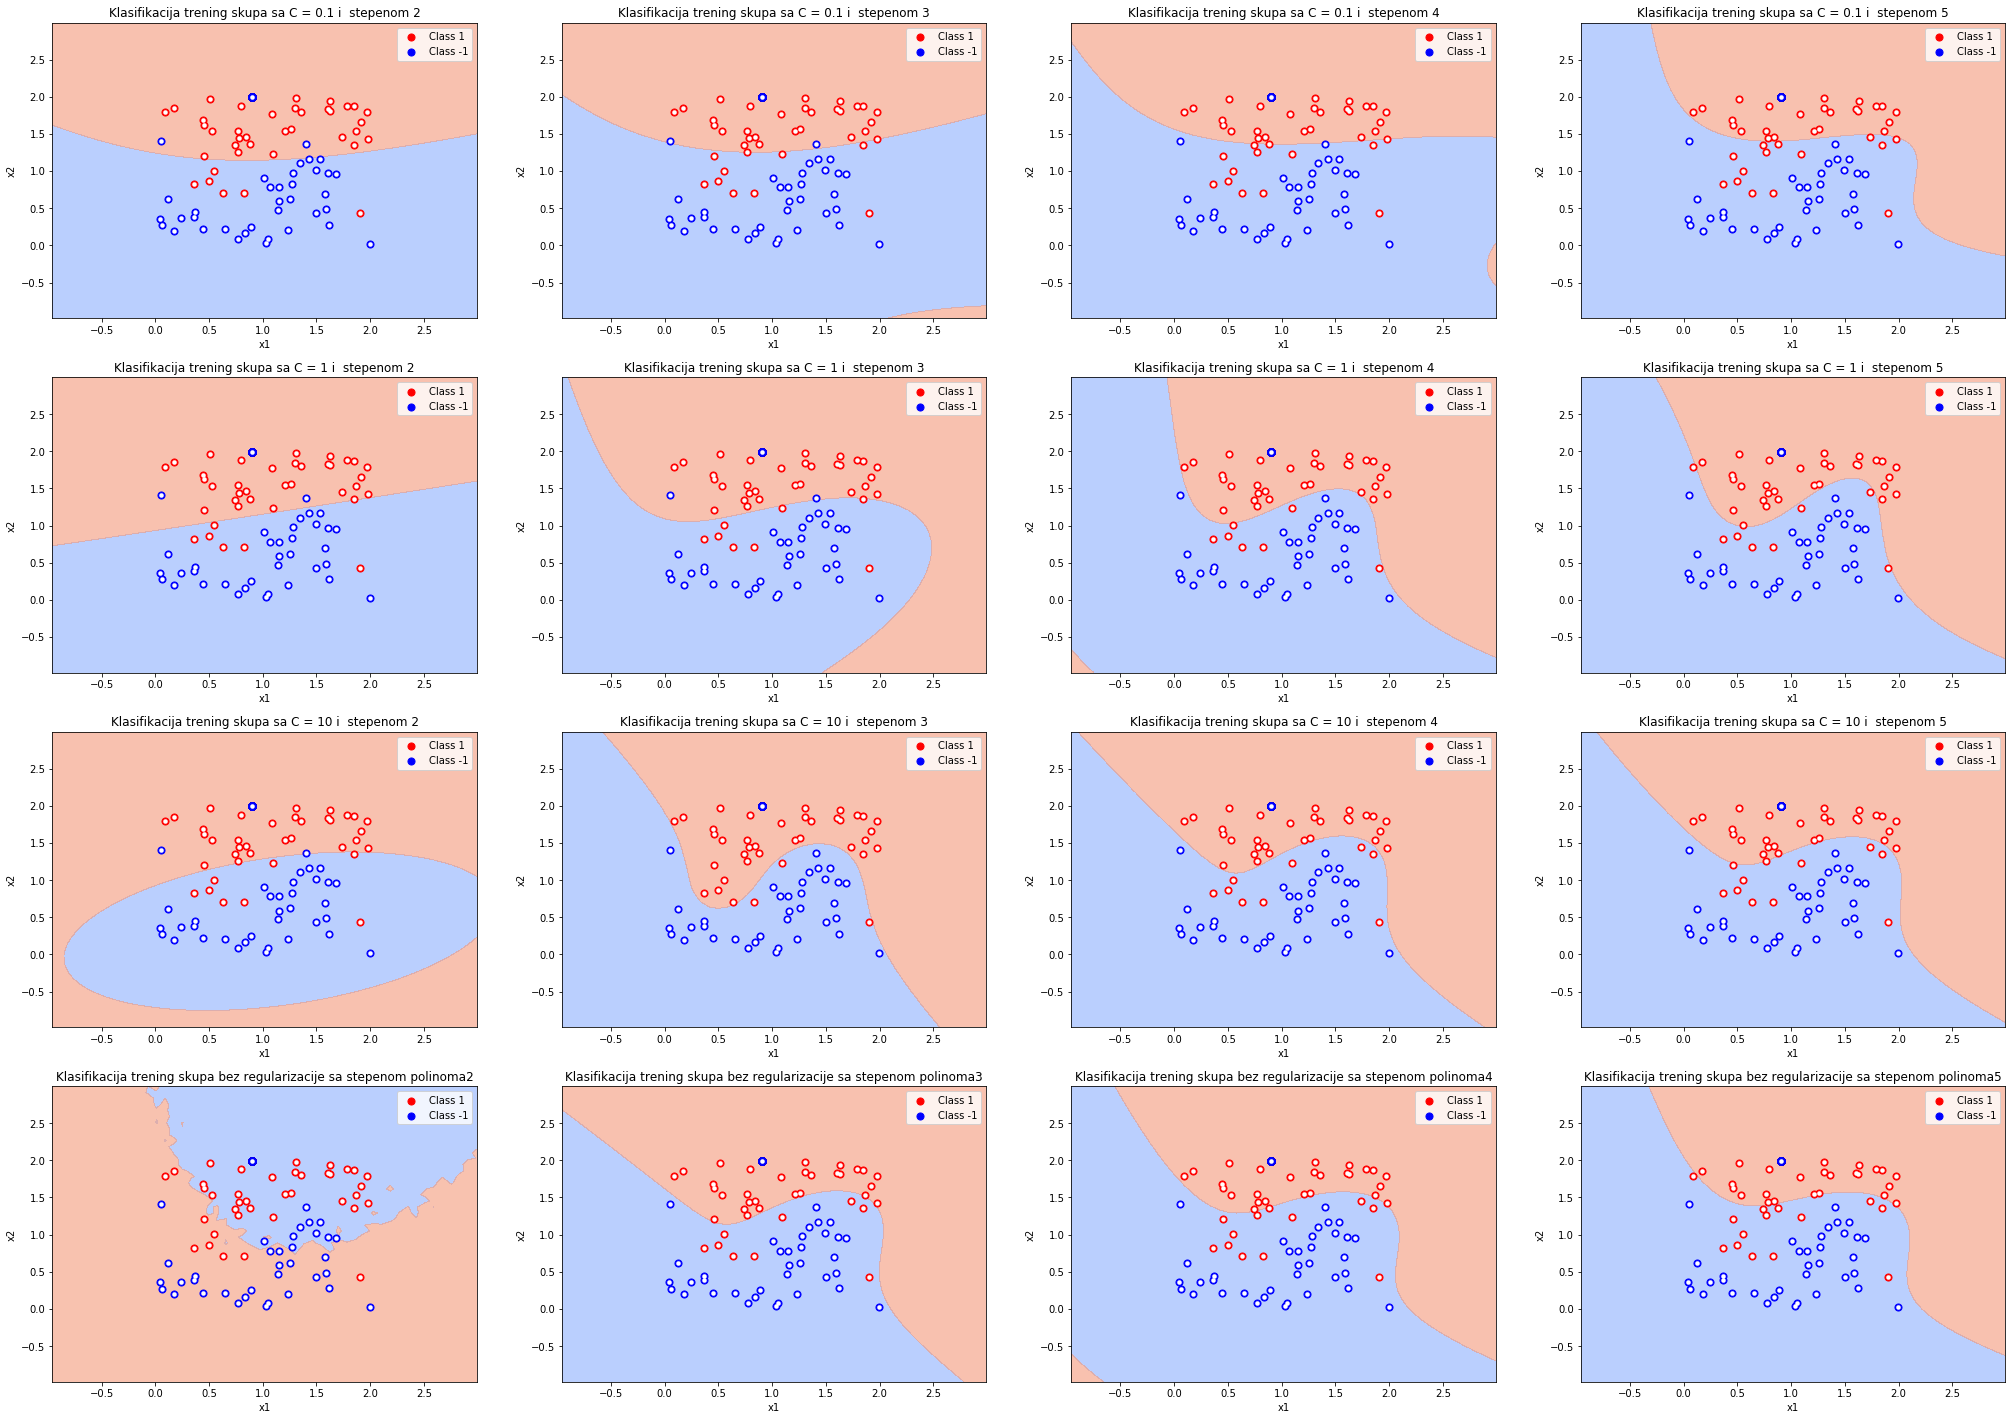

In [43]:
# Podela skupa na trenirajuci i testirajuci
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nl, y_nl, random_state = 123, shuffle = True)

# Razlicite vrednosti 
degree = [2, 3, 4, 5]
C = [0.1, 1, 10, None]

fig, axes = plt.subplots(4,4,figsize = (35, 25))

for i, c in enumerate(C):
    for j, d in enumerate(degree):
        if c==None:
            svm = SVM(kernel = 'polynomial', degree = d)
        else:
            svm = SVM(kernel = 'polynomial', C = c, degree = d)
        svm.fit(X_train_nl, y_train_nl)
        axes[i,j] = plot_class_region(fig, axes[i,j], svm, X_train_nl, y_train_nl, True) 
        if c==None:
            axes[i,j].set_title('Klasifikacija trening skupa bez regularizacije sa stepenom polinoma' + str(d))
        else:
            axes[i,j].set_title('Klasifikacija trening skupa sa C = ' + str(c) + ' i  stepenom ' + str(d)) 
        

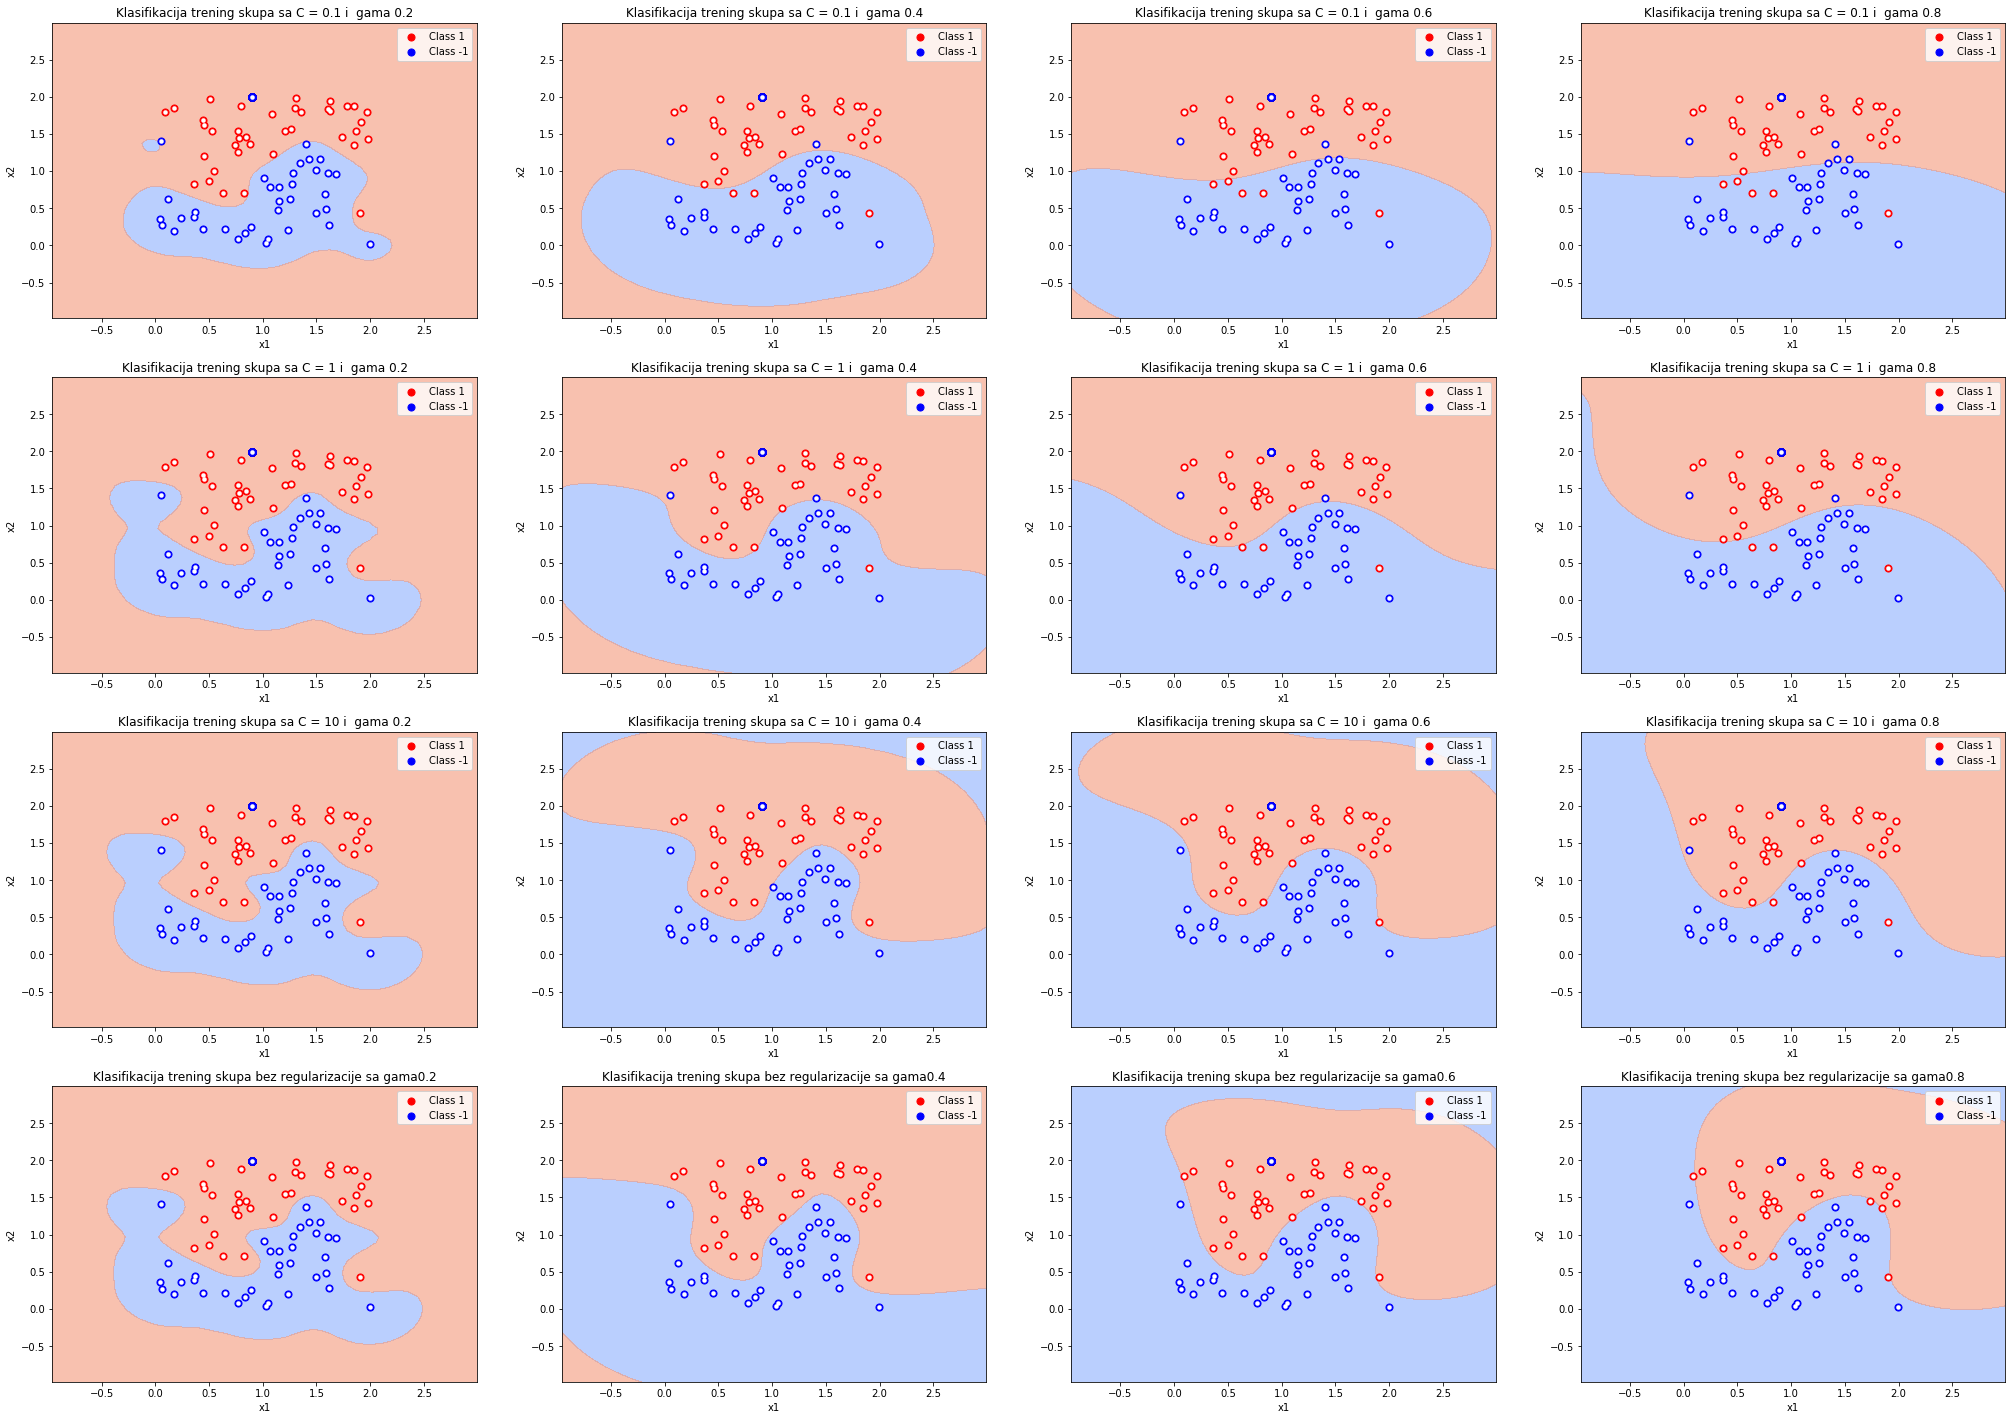

In [44]:
# Razlicite vrednosti 
gamma = [0.2, 0.4, 0.6, 0.8]
C = [0.1, 1, 10, None]

fig, axes = plt.subplots(4,4,figsize = (35, 25))

for i, c in enumerate(C):
    for j, g in enumerate(gamma):
        if c==None:
            svm = SVM(kernel = 'gaussian', gamma = g)
        else:
            svm = SVM(kernel = 'gaussian', C = c, gamma = g)
        svm.fit(X_train_nl, y_train_nl)
        axes[i,j] = plot_class_region(fig, axes[i,j], svm, X_train_nl, y_train_nl, True) 
        if c==None:
            axes[i,j].set_title('Klasifikacija trening skupa bez regularizacije sa gama' + str(g))
        else:
            axes[i,j].set_title('Klasifikacija trening skupa sa C = ' + str(c) + ' i  gama ' + str(g)) 
        

Sto se najboljih parametara tice izabrala sam ih pomocu hold-out validacije. Mozda neko od najbojih resenja se i nalazi na prethodnim slikama, a poenta je da kriva bude ona koja je bolja za generalizuju, dakle da se ne prilagodjava previse podacima iz trening skupa. Na slikama ispod bice prikazani podaci iz test skupa sa pravim klasama kojim pripadaju dobijeni sa najboljim parametrima. Takodje, bice izracunat F1 skor na test skupu i uporedjen za razlicite kernele.

In [55]:
# Vrednosti C koje se isprobavaju
C = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# Promenljive za cuvanje najboljih rezultata
best_f1 = 0
best_svm_lin = None

for i, c in enumerate(C):
    svm_lin = SVM(kernel='linear', C = c)
    svm_lin.fit(X_train_nl, y_train_nl)
    pred_lin = svm_lin.predict(X_test_nl)
    f1 = f1_score(y_test_nl, pred_lin)
    
    if f1 > best_f1:
        best_f1 = f1
        best_svm_lin = svm_lin
        best_C = c

print('Najbolji rezultat daje C = ', best_C)

Najbolji rezultat daje C =  0.01


In [56]:
# Vrednosti degree parametra
degree = [2, 3, 4, 5]

# Pocetne vrednosti
best_f1_poly = 0
best_svm_poly = None

for d in degree:
    for i, c in enumerate(C):
        svm_poly = SVM(kernel='polynomial', C = c, degree = d)
        svm_poly.fit(X_train_nl, y_train_nl)
        pred_poly = svm_poly.predict(X_test_nl)
        f1 = f1_score(y_test_nl, pred_poly)

        if f1 > best_f1_poly:
            best_f1_poly = f1
            best_svm_poly = svm_poly
            best_C_poly = c
            best_degree = d
        
print('Najbolji rezultat daje C = ', best_C_poly, 'i stepen = ', best_degree)  

Najbolji rezultat daje C =  50 i stepen =  3


In [57]:
# Vrednosti degree parametra
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Pocetne vrednosti
best_f1_gauss = 0
best_svm_gauss = None

for g in gamma:
    for i, c in enumerate(C):
        svm_gauss = SVM(kernel='gaussian', C = c, gamma = g)
        svm_gauss.fit(X_train_nl, y_train_nl)
        pred_gauss = svm_gauss.predict(X_test_nl)
        f1 = f1_score(y_test_nl, pred_gauss)

        if f1 > best_f1_gauss:
            best_f1_gauss = f1
            best_svm_gauss = svm_gauss
            best_C_gauss = c
            best_gamma = g
        
print('Najbolji rezultat daje C = ', best_C_gauss, 'i gamma = ', best_gamma)        

Najbolji rezultat daje C =  5 i gamma =  0.6


Text(0.5, 1.0, 'Klasifikacija test skupa sa Gaussovksim kernelom')

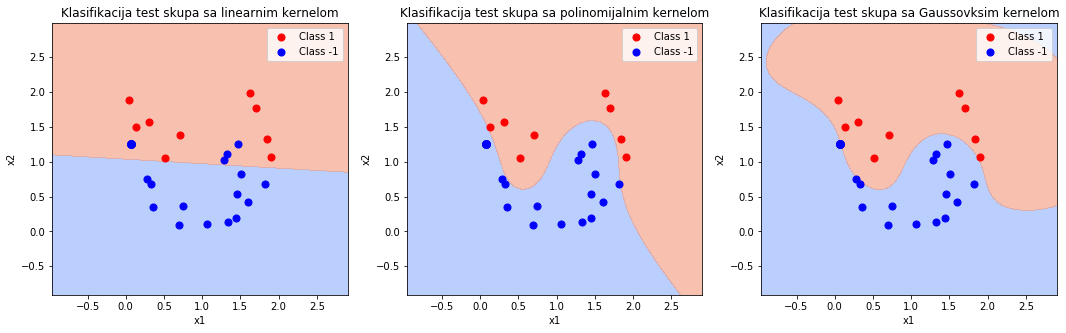

In [58]:
# Pravi se figura za plotovanje
fig, ax = plt.subplots(1, 3, figsize = (18, 5))

# Linearni kernel sa C = 0.01 
svm_lin = SVM(kernel='linear', C = best_C)
svm_lin.fit(X_train_nl, y_train_nl)
ax[0] = plot_class_region(fig, ax[0], svm_lin, X_test_nl, y_test_nl)
ax[0].set_title('Klasifikacija test skupa sa linearnim kernelom')  

# Polinomijalno kernel sa C = 50 i degree = 3 
svm_poly = SVM(kernel='polynomial', C = best_C_poly, degree = best_degree)
svm_poly.fit(X_train_nl, y_train_nl)
ax[1] = plot_class_region(fig, ax[1], svm_poly, X_test_nl, y_test_nl)
ax[1].set_title('Klasifikacija test skupa sa polinomijalnim kernelom')  

# Gaussovski kernel sa C = 5 i gamma = 0.6 
svm_gauss = SVM(kernel='gaussian', C = best_C_gauss, gamma = best_gamma)
svm_gauss.fit(X_train_nl, y_train_nl)
ax[2] = plot_class_region(fig, ax[2], svm_gauss, X_test_nl, y_test_nl)
ax[2].set_title('Klasifikacija test skupa sa Gaussovksim kernelom')  

In [60]:
# Vrednosti f1 skora za najbolje estimatore

print('Vrednost F1 skora za linearni kernel: ', best_f1)
print('Vrednost F1 skora za polinomijalni kernel: ', best_f1_poly)
print('Vrednost F1 skora Gaussovski kernel: ', best_f1_gauss)

Vrednost F1 skora za linearni kernel:  0.8181818181818181
Vrednost F1 skora za polinomijalni kernel:  1.0
Vrednost F1 skora Gaussovski kernel:  1.0
